In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
amazone = pd.read_csv('historical_data_AMZN.csv')
amazone = amazone.drop(index=[0,1])
data = amazone.copy()
data.head()
# Afficher les types de données des colonnes avant conversion
print("Types avant la conversion:")
print(data.dtypes)

Types avant la conversion:
Price        object
Adj Close    object
Close        object
High         object
Low          object
Open         object
Volume       object
dtype: object


In [41]:
# Convertir les colonnes numériques en float, en laissant la première ligne (les titres) inchangée
# Nous excluons les colonnes non numériques comme la colonne 'Date' ou toute autre colonne non numérique.
data = data.apply(pd.to_numeric, errors='ignore')  # 'ignore' laissera les chaînes comme les titres en string
data.head()


,Price,Adj Close,Close,High,Low,Open,Volume
2,1997-05-15,0.097917,0.097917,0.125000,0.096354,0.121875,1443120000
3,1997-05-16,0.086458,0.086458,0.098958,0.085417,0.098438,294000000
4,1997-05-19,0.085417,0.085417,0.088542,0.081250,0.088021,122136000
5,1997-05-20,0.081771,0.081771,0.087500,0.081771,0.086458,109344000
6,1997-05-21,0.071354,0.071354,0.082292,0.068750,0.081771,377064000


<AxesSubplot:>

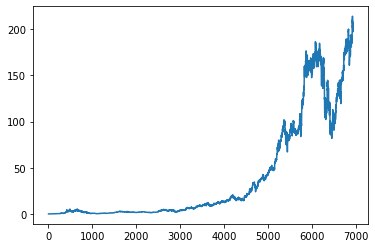

In [25]:
data['Close'].plot()

In [26]:
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [27]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

Types après conversion:
Adj Close     float64
Close         float64
High          float64
Low           float64
Open          float64
Volume          int64
Buy           float64
Sell          float64
RollingMax    float64
RollingMin    float64
dtype: object


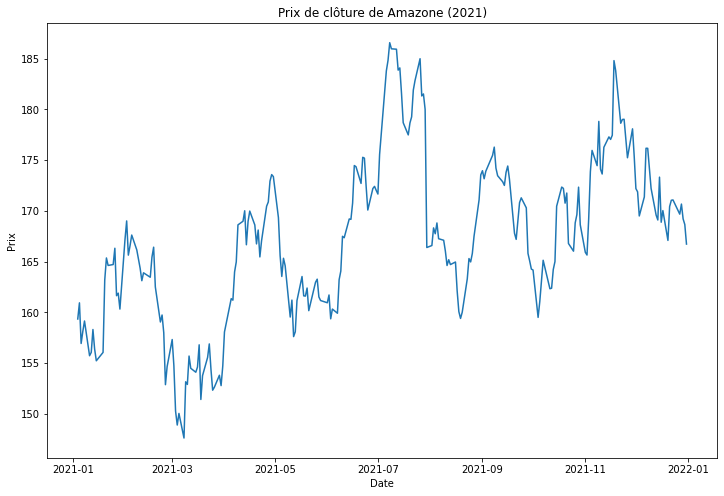

In [35]:
# Convertir la colonne "Date" en datetime et la définir comme index
# data['Price'] = pd.to_datetime(data['Price'])
# data.set_index('Price', inplace=True)

# Afficher les types de données des colonnes après la conversion
print("Types après conversion:")
print(data.dtypes)

# Définir la plage de dates de start à end (ajustez les dates selon vos besoins)
start = '2021-01-01'  # Par exemple, début janvier 2021
end = '2021-12-31'    # Fin décembre 2021

# Créer un graphique avec les données sélectionnées
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer la colonne 'Close' pour la période spécifiée
ax.plot(data['Close'][start:end])

# Ajouter des titres ou d'autres graphes si nécessaire
ax.set_title('Prix de clôture de Amazone (2021)')
ax.set_xlabel('Date')
ax.set_ylabel('Prix')

# Afficher le graphique
plt.show()

In [36]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

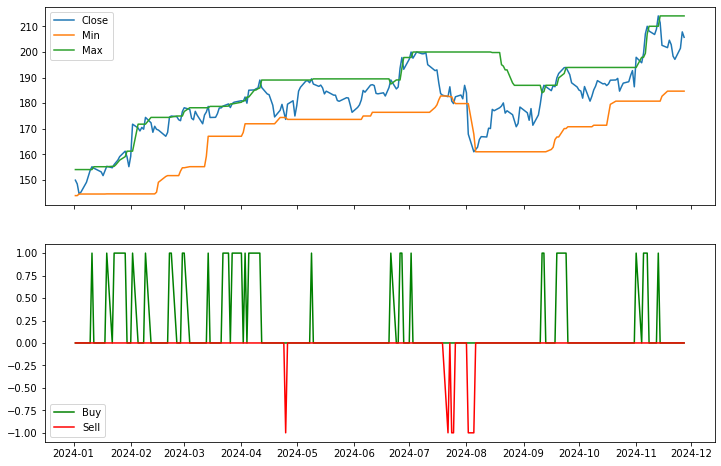

In [38]:
start='2024'
end='2024'
fig, ax=plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
# plt.subplots(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['Close', 'Min', 'Max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy', 'Sell'])

Types avant la conversion:
Adj Close     float64
Close         float64
High          float64
Low           float64
Open          float64
Volume          int64
Buy           float64
Sell          float64
RollingMax    float64
RollingMin    float64
dtype: object
